<a href="https://colab.research.google.com/github/yeyevtushenko/AI/blob/Lesson08.05.2024/Lesson08_05_2024_AI_H_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module7/data/segmentation%20data.csv')
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [3]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [5]:
df.drop(columns='ID', inplace=True)

In [6]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


In [7]:
scaler = MinMaxScaler()
data = scaler.fit_transform(df)

In [8]:
model = KMeans(n_init=30, random_state=42)

In [9]:
metrics = ['distortion', 'silhouette', 'calinski_harabasz']
end_k = 8

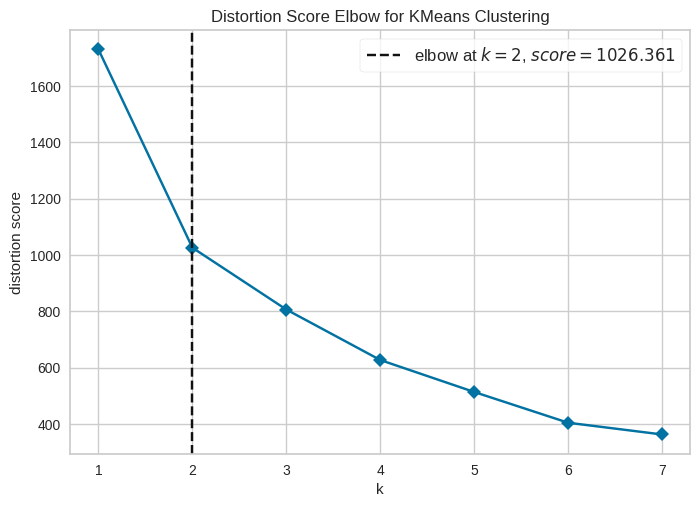

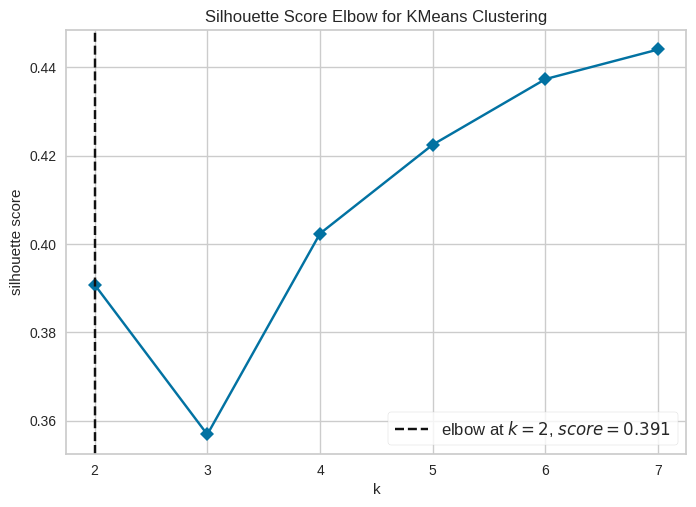

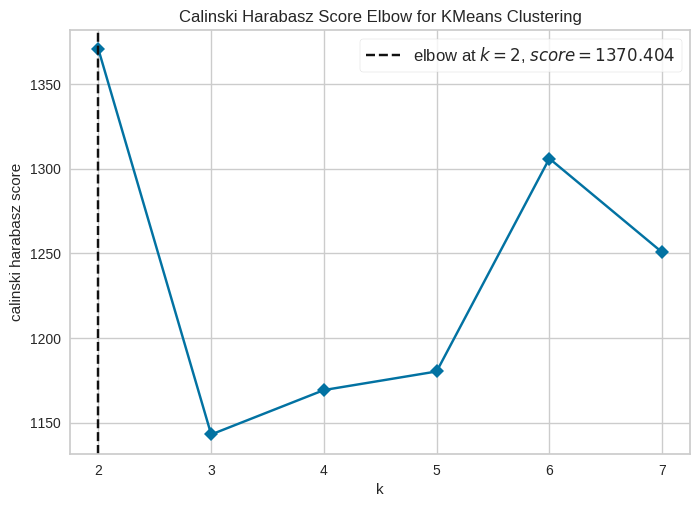

In [10]:
for metric in metrics:
    start_k = 1 if metric == "distortion" else 2
    visualizer = KElbowVisualizer(model,
                              k=(start_k, end_k),
                              timings=False,
                              metric=metric,
                              distance_metric='euclidean'
                              )

    visualizer.fit(data)
    visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


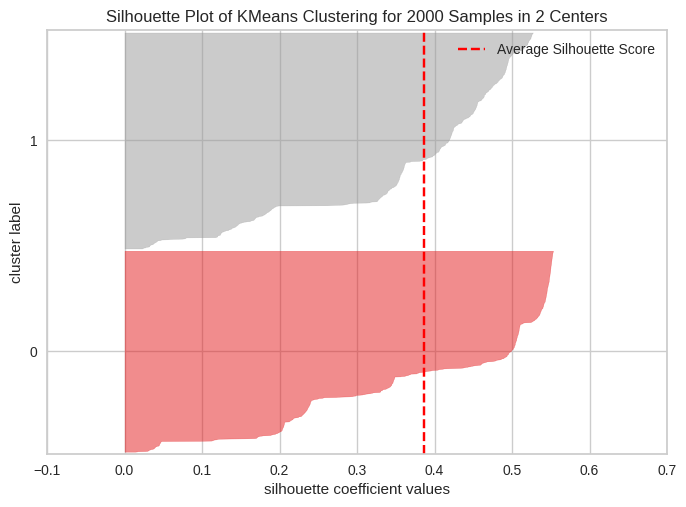

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2000 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [11]:
visualizer = SilhouetteVisualizer(KMeans(2))
visualizer.fit(data)
visualizer.show()

In [12]:
kmeans = KMeans(2)
kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [13]:
df['cluster_id'] = kmeans.labels_

df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster_id
0,0,0,67,2,124670,1,2,1
1,1,1,22,1,150773,1,2,0
2,0,0,49,1,89210,0,0,1
3,0,0,45,1,171565,1,1,1
4,0,0,53,1,149031,1,1,1


In [14]:
df['cluster_id'].value_counts()

cluster_id
1    1086
0     914
Name: count, dtype: int64

In [15]:
results = df.groupby(by='cluster_id').mean()
results

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
cluster_id,,,,,,,
0,1.0,0.805252,33.573304,1.198031,112850.047046,0.669584,0.472648
1,0.0,0.236648,37.874770,0.903315,127775.225599,0.929098,0.963168


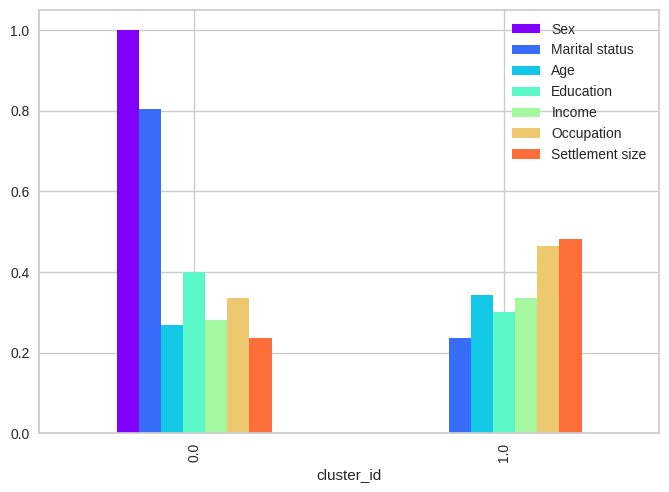

In [16]:
scaler = MinMaxScaler()

data = scaler.fit_transform(df)

normalized_df = pd.DataFrame(data, columns=df.columns, index=df.index)

results = normalized_df.groupby(by='cluster_id').mean()

color = plt.cm.rainbow(np.linspace(0, 1, normalized_df.shape[1]))

results.plot(kind='bar', color=color)
plt.show()

In [17]:
results

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
cluster_id,,,,,,,
0.0,1.0,0.805252,0.268505,0.399344,0.281569,0.334792,0.236324
1.0,0.0,0.236648,0.342668,0.301105,0.336133,0.464549,0.481584


# **CLEANIND DATA FROM OUTLIERS AND CLASTERIZATING CLEANED DATA**

In [18]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df >= lower_bound) & (df <= upper_bound)].dropna()

In [19]:
scaler = StandardScaler()
data = scaler.fit_transform(df)

In [20]:
model = KMeans(n_init=30, random_state=42)

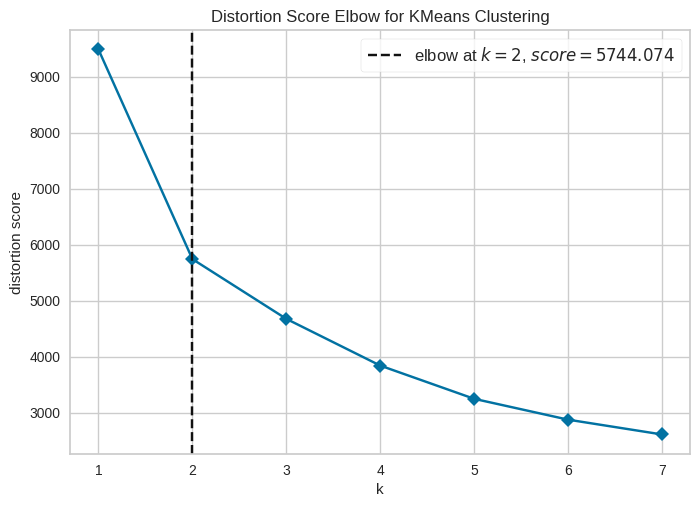

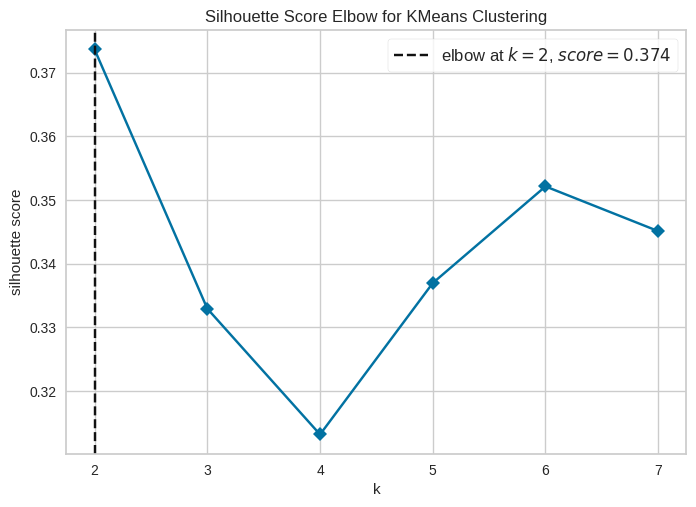

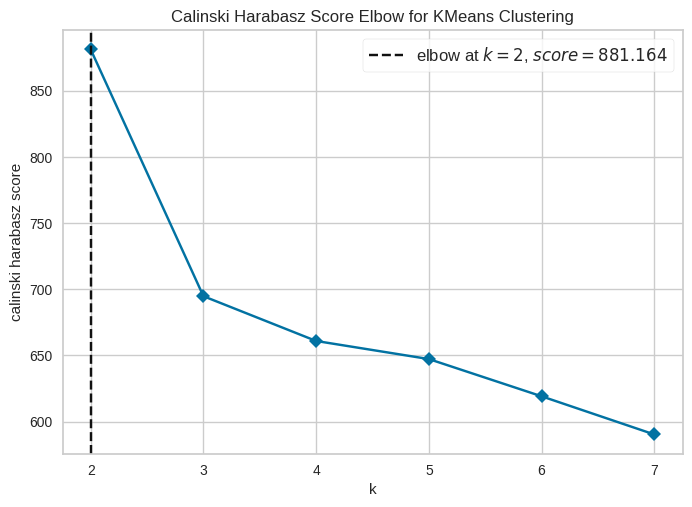

In [21]:
metrics = ['distortion', 'silhouette', 'calinski_harabasz']
end_k = 8

for metric in metrics:
    start_k = 1 if metric == "distortion" else 2
    visualizer = KElbowVisualizer(model,
                              k=(start_k, end_k),
                              timings=False,
                              metric=metric,
                              distance_metric='euclidean'
                              )

    visualizer.fit(data)
    visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


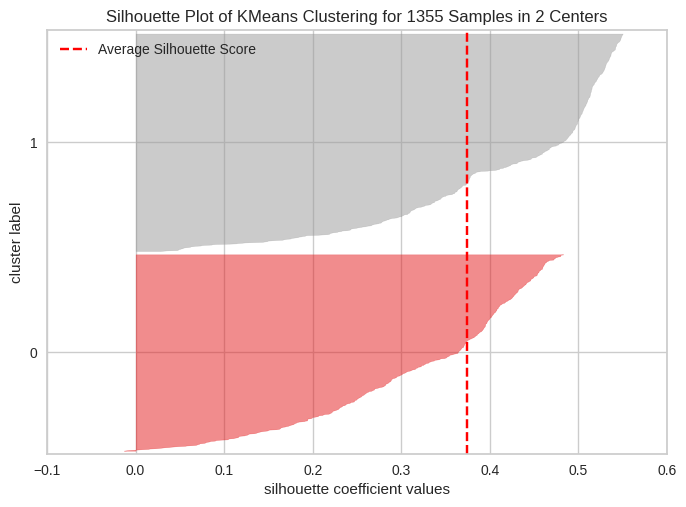

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1355 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [22]:
visualizer = SilhouetteVisualizer(KMeans(2))
visualizer.fit(data)
visualizer.show()

In [23]:
kmeans = KMeans(2)
kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [24]:
df['cluster_id'] = kmeans.labels_

In [25]:
df['cluster_id'].value_counts()

cluster_id
0    712
1    643
Name: count, dtype: int64

In [26]:
results = df.groupby(by='cluster_id').mean()
results

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
cluster_id,,,,,,,
0,0.967697,0.821629,28.945225,1.0,105417.179775,0.633427,0.410112
1,0.000000,0.265941,37.945568,1.0,123807.175739,0.934681,0.965785


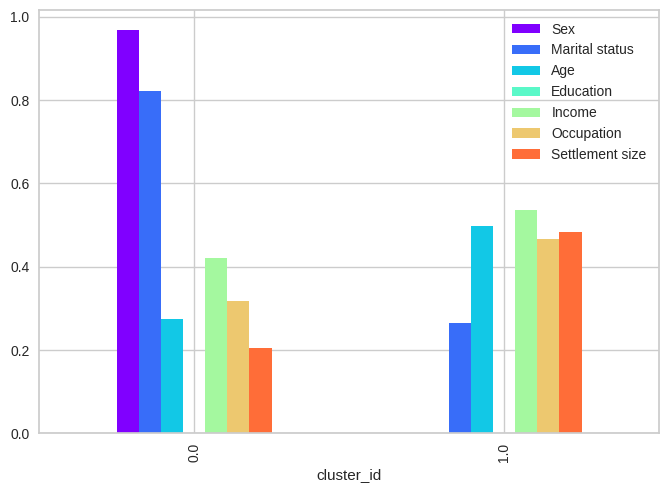

In [27]:
scaler = MinMaxScaler()

data = scaler.fit_transform(df)

normalized_df = pd.DataFrame(data, columns=df.columns, index=df.index)

results = normalized_df.groupby(by='cluster_id').mean()

color = plt.cm.rainbow(np.linspace(0, 1, normalized_df.shape[1]))

results.plot(kind='bar', color=color)
plt.show()

*   Claster 0:      
                Sex - mostly female (close to 1)
                Marital status - mostly maried (close to 1)
                Age - mostly yang
                Education - same for both claster, probably average
                Income - a bit less then average
                Ocupation - 0.3 - with less then average salary
                Settlement sise - 0.2 - small

*   Claste 1:       
                Sex - mostly male (close to 0)
                Marital status - mostly not maried
                Age - mostly adult (average age)
                Education - same for both claster, probably average
                Income - a bit higher then average
                Ocupation - average level
                Settlement sise - bigger then average     

*   General conclusion:
                Cluster 0 includes predominantly young women with
                below-average incomes, likely more inclined to work in
                low-paying jobs in medium-sized or small cities, and most of
                them are in stable relationships.

                Cluster 1 includes older men with above-average incomes,
                likely with higher-paying jobs in mid-sized or large cities,
                and less than half of them are in stable relationships.           
                                
                